In [12]:
import os
from pathlib import Path
from ultralytics import YOLO


import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from ultralytics.yolo.utils.plotting import Annotator

import timm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

from ViT.tooth_crop_dataset import ToothCropClassDataset
from utils.vit import train, test

from utils.data import DentexDataset



# Data prepare

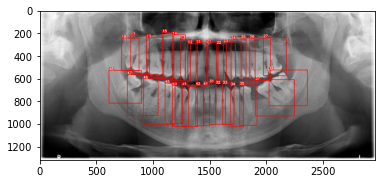

In [9]:
load_dotenv()
data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023'

dataset = DentexDataset(root_dir=data_dir, sample=True)

dataset.plot('train_95.png')


In [10]:
dataset.yolo_yaml_gen()


# Training

In [11]:
model = YOLO('yolov8n.pt')

results = model.train(data='coco128.yaml', epochs=100, imgsz=640)


Ultralytics YOLOv8.0.182 🚀 Python-3.9.16 torch-1.10.0 CPU (Apple M1)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/lucyxu/PycharmProjects/dentist-CV/supervised/../data/dentex-sample/dentex.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, 

zero-size array to reduction operation maximum which has no identity


Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
  0%|          | 0/9 [00:00<?, ?it/s]/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      1/100         0G          0      128.8          0          0        640:  33%|███▎      | 3/9 [00:17<00:34,  5.68s/it]


KeyboardInterrupt: 